In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Bootstrap

### Recap

In [2]:
# Population we were working with
sf_pop = Table.read_table('san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))


Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


Population Median =  112965.15


C:\Users\Abra\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


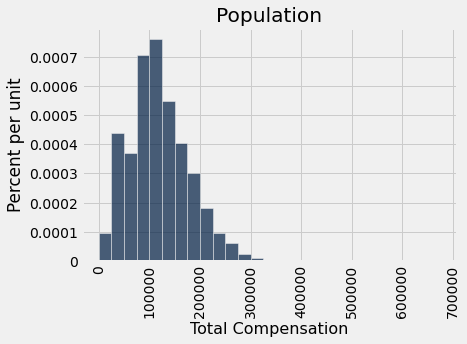

In [4]:
# Displays Total compensation 
pop_median = percentile(50, sf_pop.column('Total Compensation'))
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median =  112965.15
Sample Median =  114481.51


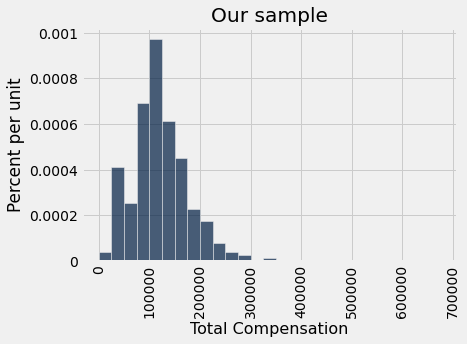

In [5]:
# Random sample of size 300
our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
print("Sample Median = ", our_sample_median)
plots.title('Our sample');

In [6]:
# Empirical distribution of the sample median
# assuming we can just resample from the population
def one_sample_median():
    single_sample = sf_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('Total Compensation'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)

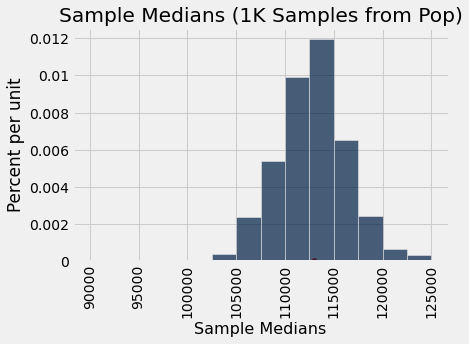

In [7]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        112965.15
Our Sample Median =        112412.86
Bootstrap Sample Median =  111612.97


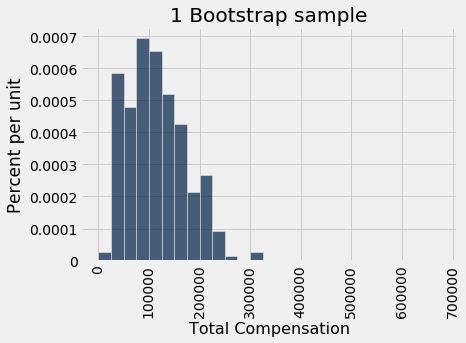

In [8]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [9]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('Total Compensation'))

In [10]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

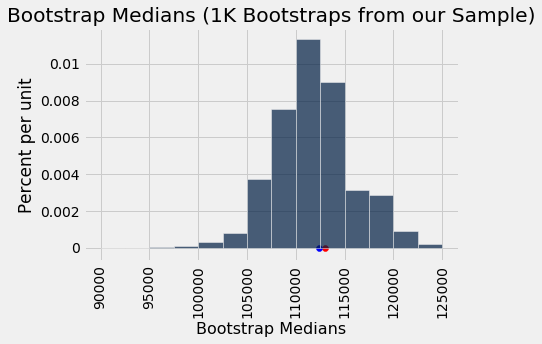

In [11]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

### 95% Confidence Interval

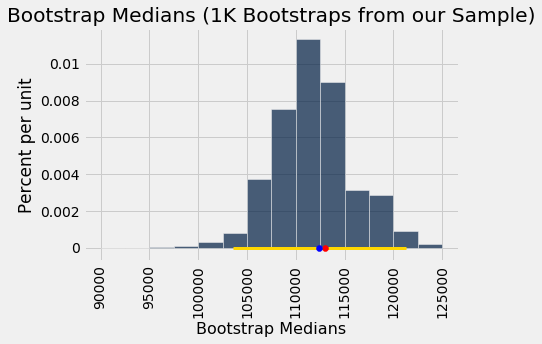

In [12]:
# Make an interval based on the middle 95% of bootstrap samples

left = ...
right = ...

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [27]:
# This time we have a sample, but no population data!
# Estimate the average age of Mothers
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


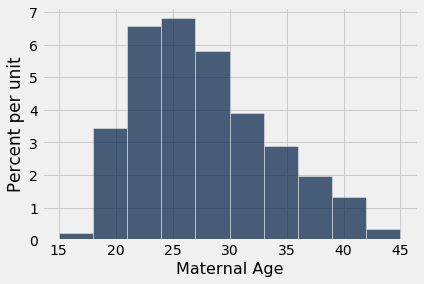

In [28]:
# What is the distribution of mothers ages? 
births.hist('Maternal Age')

In [29]:
# Can you find the average age? 
mean_age = np.mean(births.column('Maternal Age'))
mean_age
# Sample average

27.228279386712096

In [30]:
# create a function the finds a boostrap sample 
# and the computes the mean
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [31]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
# Find 95% Confidence interval
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

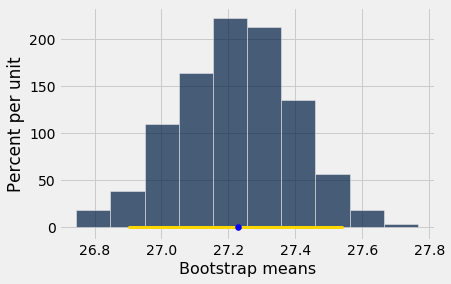

In [32]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');